In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle 
import re
import datetime
import dateutil
from efunds import EFund
import collections as coll
import statsmodels.api as sm
import matplotlib

%matplotlib inline

//anaconda/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
## eVestment Data Readin


InvUniverse_Name= ['USLargeCore', 'USLargeGrowth', 'USLargeValue']

# sample_period= '7817'

# # produce return series timestamp
# tmp_indx= []
# t= datetime.datetime( year= 1978, month= 1, day= 31)
# t= t+ dateutil.relativedelta.relativedelta( day= 31)
# tmp_indx.append( t)
# while t< datetime.datetime( year= 2017, month= 12, day=30):
#     t= t+ dateutil.relativedelta.relativedelta( months=1, day= 31)
#     tmp_indx.append( t)

# # read in data
# InvUniverse= dict()
# FundAttr_dict= dict()
# FundRet_dict= dict()
# USLaregeEquity_Index= set()
# for u in InvUniverse_Name:
#     a= pd.read_excel( io= 'eVestment/eV_'+ u+ '_'+sample_period+'.xlsx', 
#                      sheet_name= u+' General Info',
#                      index_col= None, na_values='---' ).dropna(how= 'all', axis=0)
#     a['eVestment Product ID']= a['eVestment Product ID'].astype(int).astype(str)
#     a.set_index('eVestment Product ID', inplace=True)
#     tmp_flag= [ re.match( 'Returns -', x) is not None for x in a.columns]
#     a_attr= a.loc[:, np.logical_not( tmp_flag)].transpose()
#     a_ret= a.loc[:, tmp_flag].transpose()/100
#     a_ret.index= tmp_indx
#     FundAttr_dict.update(a_attr.to_dict())
#     FundRet_dict.update( a_ret.to_dict())
#     a_indx= list(a_attr.loc[ :, a_attr.loc['VT', :]=='IX'].columns)
#     USLaregeEquity_Index= USLaregeEquity_Index.union(set( a_indx))
    
#     InvUniverse[u]= list(set(a_attr.columns)- set(a_indx))
#     InvUniverse[u+'_INDEX']= a_indx


# FundAttr= pd.DataFrame( FundAttr_dict)
# FundRet= pd.DataFrame(FundRet_dict)



# pickle.dump(FundAttr, open('FundAttr.p', 'wb'))
# pickle.dump(FundRet,  open('FundRet.p', 'wb'))
# pickle.dump(InvUniverse, open('InvUniverse.p', 'wb'))

FundAttr= pickle.load(open('FundAttr.p', 'rb'))
FundRet= pickle.load( open('FundRet.p', 'rb'))
InvUniverse= pickle.load( open( 'InvUniverse.p', 'rb'))


INDX_raw= pickle.load(open('INDX_raw.p','rb'))
INDX_Ret= pd.concat( list({k: (x- x.shift(1))/x.shift(1) for k,x in INDX_raw.items()}.values()), axis=1) 
INDX_Ret['Value_Prem']= INDX_Ret['RU1000VTR']- INDX_Ret['RU1000TR']
INDX_Ret= INDX_Ret.loc[np.logical_and(INDX_Ret.index>= datetime.datetime(1985,1,1), 
                                      INDX_Ret.index<= datetime.datetime(2017, 12,31)), ]
FundRet= FundRet.loc[np.logical_and(  FundRet.index>= datetime.datetime(1985,1,1), 
                                      FundRet.index<= datetime.datetime(2017,12,31)), ]
INDX_EFunds= {'RU1000TR': EFund(EProdID='RU1000TR', ret= INDX_Ret['RU1000TR']),
             'RU1000VTR': EFund(EProdID='RU1000VTR', ret= INDX_Ret['RU1000VTR']),
             'RU1000GTR': EFund(EProdID='RU1000GTR', ret= INDX_Ret['RU1000GTR'])}
INDX_Ret['Bull']= INDX_Ret.RU1000TR>=0

# writer= pd.ExcelWriter('eVFund.xlsx')
# pd.concat([FundAttr, FundRet], axis=0).to_excel(writer, sheet_name= 'USLargeCap')
# writer.save()

#### How many funds keeps reporting in each year? 



//anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.groupby() is deprecated and will be removed; Please use the Series.groupby() or DataFrame.groupby() methods
  This is separate from the ipykernel package so we can avoid doing imports until
//anaconda/lib/python3.5/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0,0.5,'Number of Managers')

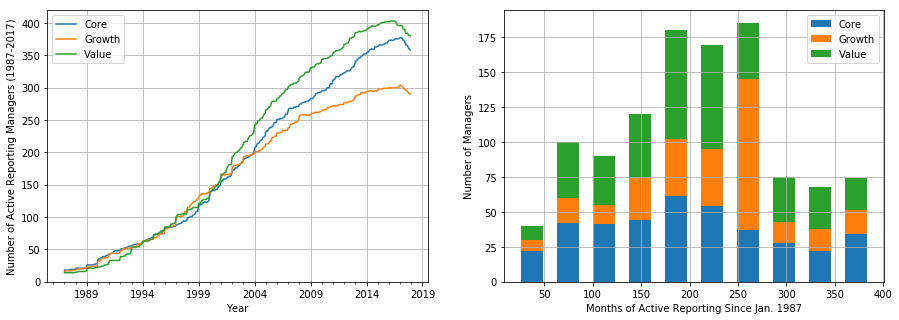

In [3]:

def stackhist(x, y, **kws):
    grouped = pd.groupby(x, y)
    data = [d for _, d in grouped]
    labels = [l for l, _ in grouped]
    plt.hist(data, histtype="barstacked", label=labels, align= 'right',rwidth=.6)
    
    
plt.figure(figsize=(15,5))
ax= plt.subplot(121)
# ax.set_yscale('log', basey= 2)
FundRet.loc[FundRet.index>= datetime.datetime(1987, 1,1) ,InvUniverse['USLargeCore']].count(axis =1).plot(label= 'Core', ax=ax )
FundRet.loc[FundRet.index>= datetime.datetime(1987,1,1),InvUniverse['USLargeGrowth']].count(axis=1).plot(label= 'Growth', )
FundRet.loc[FundRet.index>= datetime.datetime(1987,1,1),InvUniverse['USLargeValue']].count(axis=1).plot(label= 'Value', ax=ax )
plt.legend()
plt.ylabel('Number of Active Reporting Managers (1987-2017)')
plt.xlabel('Year')
plt.ylim((0, 420))
plt.grid()
ax= plt.subplot(122)

a1= FundRet.loc[FundRet.index>= datetime.datetime(1987,1,1), InvUniverse['USLargeCore']].count(axis=0)
a1.name= 'Life'
a1= pd.DataFrame(a1)
a1['Strategy']='Core'
a2= FundRet.loc[FundRet.index>= datetime.datetime(1987,1,1), InvUniverse['USLargeValue']].count(axis=0)
a2.name= 'Life'
a2= pd.DataFrame(a2)
a2['Strategy']='Value'
a3= FundRet.loc[FundRet.index>= datetime.datetime(1987,1,1), InvUniverse['USLargeGrowth']].count(axis=0)
a3.name= 'Life'
a3= pd.DataFrame(a3)
a3['Strategy']='Growth'

tmp= pd.concat([a1, a2, a3], axis=0)
stackhist(tmp.Life, tmp.Strategy)
plt.legend()
plt.grid()
plt.xlabel('Months of Active Reporting Since Jan. 1987')
plt.ylabel('Number of Managers')


In [4]:
# FundLife 
a1= {}
for k, v in InvUniverse.items():
    for ID in v:
        a1.update({ID: k})
a1= pd.Series(a1, name='Type')

a2= {}
a3= {}
a4= {}
for ID in FundRet.columns:
    t= FundRet[ID].dropna()
    if t.shape[0]==0: 
        continue

    a4[ID]= t.shape[0]
    a2[ID]= t.index[0]
    a3[ID]= t.index[-1]
    
a2= pd.Series(a2, name='Start')
a3= pd.Series(a3, name= 'End')
a4= pd.Series(a4, name= 'Length')

FundLife= pd.concat([a2, a3, a4, a1], axis=1).dropna(how='any', axis=0)


In [5]:
# FundExcessRet
FundExcessRet= {}
FundExcessRet['USLargeCore']= FundRet.loc[:,[x in InvUniverse['USLargeCore'] for x in FundRet.columns]].subtract(INDX_Ret['RU1000TR'], axis=0).dropna(how='all', axis=0)
FundExcessRet['USLargeGrowth']= FundRet.loc[:, [x in InvUniverse['USLargeGrowth'] for x in FundRet.columns]].subtract(INDX_Ret['RU1000GTR'], axis=0).dropna(how='all', axis=0)
FundExcessRet['USLargeValue']= FundRet.loc[:, [x in InvUniverse['USLargeValue'] for x in FundRet.columns]].subtract( INDX_Ret['RU1000VTR'], axis=0).dropna(how='all', axis=0)


m_c= pd.DataFrame(FundExcessRet['USLargeCore'].rolling(window= 12, min_periods= 10, axis=0).mean().median(axis=1), columns=['12M Avg Excess Ret, Median, Core'])
m_g= pd.DataFrame(FundExcessRet['USLargeGrowth'].rolling(window=12, min_periods=10, axis=0).mean().median(axis=1), columns=['12M Avg Excess Ret, Median, Growth'])
m_v= pd.DataFrame(FundExcessRet['USLargeValue'].rolling(window=12, min_periods=10, axis=0).mean().median(axis=1), columns=['12M Avg Excess Ret, Median, Value'])
m_c= m_c.loc[m_c.index>= datetime.datetime(1987,1,1), ]
m_g= m_g.loc[m_g.index>= datetime.datetime(1987,1,1), ]
m_v= m_v.loc[m_v.index>= datetime.datetime(1987,1,1), ]
m_c['HY_end']= [x.month%6==0 for x in m_c.index]
m_g['HY_end']= [x.month%6==0 for x in m_g.index]
m_v['HY_end']= [x.month%6==0 for x in m_v.index]
# m_c= m_c.loc[m_c.HY_end, ]
# m_g= m_g.loc[m_g.HY_end, ]
# m_v= m_v.loc[m_v.HY_end, ]
# m_c['H']= [ str(x.year)+  ' H'+str(int(np.ceil(x.month/6))) for x in m_c.index]
# m_g['H']= [ str(x.year)+  ' H'+str(int(np.ceil(x.month/6))) for x in m_g.index]
# m_v['H']= [ str(x.year)+  ' H'+str(int(np.ceil(x.month/6))) for x in m_v.index]




# FundExcessRet= FundRet.loc[FundRet.index>= datetime.datetime(1987,1,1), ].subtract(INDX_Ret['RU1000TR'], axis=0).dropna(how='all', axis=0)
# m_c= pd.DataFrame(FundExcessRet.loc[:, [x in InvUniverse['USLargeCore'] for x in FundExcessRet.columns]].median(axis=1))
# m_g= pd.DataFrame( FundExcessRet.loc[:,[x in InvUniverse['USLargeGrowth'] for x in FundExcessRet.columns]].median(axis=1))
# m_v= pd.DataFrame(FundExcessRet.loc[:,[x in InvUniverse['USLargeValue'] for x in FundExcessRet.columns]].median(axis=1))

# m_c.columns= ['MedianExcessRet']
# m_g.columns= ['MedianExcessRet']
# m_v.columns= ['MedianExcessRet']

# m_c['H']= [ str(x.year)+  ' H'+str(int(np.ceil(x.month/6))) for x in m_c.index]
# m_g['H']= [ str(x.year)+  ' H'+str(int(np.ceil(x.month/6))) for x in m_g.index]
# m_v['H']= [ str(x.year)+  ' H'+str(int(np.ceil(x.month/6))) for x in m_v.index]


In [6]:
ax= m_c.plot(figsize=(10,5))
m_g.plot(ax= ax)
m_v.plot(ax=ax)
plt.grid()

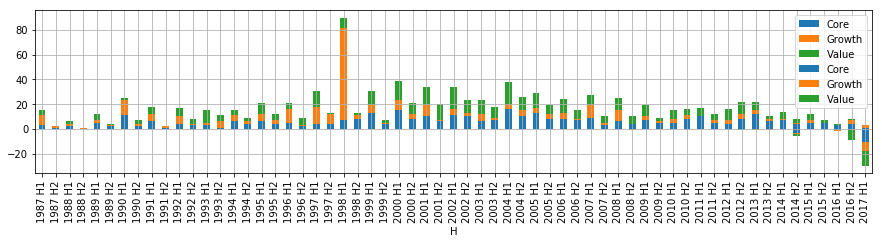

In [7]:
u= pd.Series(FundRet.index, index= FundRet.index)

g1= FundLife.groupby(['Type', 'Start']).count()
t1= pd.concat([g1.loc[('USLargeCore'), 'End'], u], axis=1)['End'].fillna(0)
t1.name= 'Core'
t2= pd.concat([g1.loc[('USLargeGrowth'), 'End'], u], axis=1)['End'].fillna(0)
t2.name= 'Growth'
t3= pd.concat([g1.loc[('USLargeValue'), 'End'], u], axis=1)['End'].fillna(0)
t3.name= 'Value'
FundNewRep= pd.concat([t1, t2, t3], axis=1)
FundNewRep= FundNewRep.loc[np.logical_and(FundNewRep.index>= datetime.datetime(1987,1,1), FundNewRep.index<= datetime.datetime(2017,7,1)), ]
FundNewRep['H']= [ str(x.year)+' H'+str(int(np.ceil(x.month/6))) for x in FundNewRep.index] 

g2= FundLife.groupby(['Type', 'End']).count()
t4= pd.concat([g2.loc[('USLargeCore'), 'Start'], u], axis=1)['Start'].fillna(0)
t4.name= 'Core'
t5= pd.concat([g2.loc[('USLargeGrowth'), 'Start'], u], axis=1)['Start'].fillna(0)
t5.name= 'Growth'
t6= pd.concat([g2.loc[('USLargeValue'), 'Start'], u], axis=1)['Start'].fillna(0)
t6.name= 'Value'
FundNewStop= pd.concat([t4, t5, t6], axis=1)
FundNewStop= FundNewStop.loc[np.logical_and(FundNewStop.index>= datetime.datetime(1987,1,1), FundNewStop.index<= datetime.datetime(2017,7,1)), ]
FundNewStop['H']= [ str(x.year)+' H'+str(int(np.ceil(x.month/6))) for x in FundNewStop.index] 


tmp1= FundNewRep.groupby('H').sum()
ax= tmp1.plot.bar(figsize=(15,3), stacked= True)
tmp2= FundNewStop.groupby('H').sum()* (-1)
tmp2.plot.bar(stacked= True, ax= ax)
plt.legend()
plt.grid()


In [8]:

# FundRet[InvUniverse['USLargeCore']].count(axis=0).hist()

sns.distplot(FundRet[InvUniverse['USLargeCore']].count(axis=0), hist= True, label='Core')
sns.distplot(FundRet[InvUniverse['USLargeValue']].count(axis=0), hist= True, label= 'Value')
sns.distplot(FundRet[InvUniverse['USLargeGrowth']].count(axis=0),hist= True, label='Growth')
plt.legend()

#### Is it possible to map ConEd managers to certain group/family of funds in Evestment? 



In [9]:
eVFunds= {}
eVFundsRegs= {}
eVFundsRegs_Bull= {}
eVFundsRegs_Bear= {}

# for k, v in InvUniverse.items():
#     tmp = {}
#     regs= {}
#     for ID in v:
#         r= FundRet[ID]
#         if r.count()<10:
#             continue
#         a= EFund(EProdID=ID, ret=r, benchmark=INDX_EFunds['RU1000TR'])
#         if not(a.isMissing) and a.validRet.shape[0]>=10:
#             tmp[ID]= a
#             regs[ID]= sm.OLS(endog=a.validRet, exog= sm.add_constant(a.benchmarkRet)).fit()
    
#     EvFunds[k]= tmp
#     EvFunds_Stats[k]= regs
for ID in FundRet.columns:
    r= FundRet[ID]
    if r.count()<10:
        continue
    a= EFund( EProdID= ID, ret= r, benchmark= INDX_EFunds['RU1000TR'])
    if not (a.isMissing):
        eVFunds[ID]= a
        ret= a.validRet.copy(deep=True)
        ret.name= ID+'_ret'
        d= sm.add_constant(pd.concat([ret, a.benchmarkRet, INDX_Ret[['Value_Prem', 'Bull']]], axis=1).dropna(how='any', axis=0))
        d1= d.loc[d.Bull, ]
        d2= d.loc[np.logical_not(d.Bull), ]
        eVFundsRegs[ID]= sm.OLS(endog= d[ret.name], exog= d.drop([ret.name, 'Bull'], axis=1), missing='drop').fit()
        if d1.shape[0]>=10:
            eVFundsRegs_Bull[ID]= sm.OLS(endog= d1[ret.name],  exog= d1.drop([ret.name, 'Bull'], axis=1), missing='drop').fit()
        if d2.shape[0]>=10:
            eVFundsRegs_Bear[ID]= sm.OLS(endog= d2[ret.name],  exog= d2.drop([ret.name, 'Bull'], axis=1), missing='drop').fit()
        

In [10]:
FundRet['604716'].plot(figsize= (15,3))

In [11]:
eVFunds_Type= {}
for k,v in InvUniverse.items():
    for ID in v:
        eVFunds_Type[ID]= k
eVFunds_beta0= {k:v.params for k, v in eVFundsRegs.items()}
eVFunds_beta1= {k:v.params for k, v in eVFundsRegs_Bull.items()}
eVFunds_beta2= {k:v.params for k, v in eVFundsRegs_Bear.items()}

eVFunds_pValue0= {k:v.pvalues for k,v in eVFundsRegs.items()}
eVFunds_pValue1= {k:v.pvalues for k,v in eVFundsRegs_Bull.items()}
eVFunds_pValue2= {k:v.pvalues for k,v in eVFundsRegs_Bear.items()}

eVFunds_nobs0= {k:v.nobs for k,v in eVFundsRegs.items()}
eVFunds_nobs1= {k:v.nobs for k,v in eVFundsRegs_Bull.items()}
eVFunds_nobs2= {k:v.nobs for k,v in eVFundsRegs_Bear.items()}


c= pd.Series(eVFunds_Type, name='Type')
eVFunds_0= pd.concat([pd.DataFrame(eVFunds_beta0).T, pd.Series(eVFunds_nobs0, name= 'NObs')], axis=1)
eVFunds_0['BenchmarkCond']= 'Overall'
eVFunds_0= pd.concat([eVFunds_0, c], axis=1).dropna(how='any', axis=0)
eVFunds_0.index.name= 'EProdID'
eVFunds_0.reset_index(inplace=True)

eVFunds_1= pd.concat([pd.DataFrame(eVFunds_beta1).T, pd.Series(eVFunds_nobs1, name= 'NObs')], axis=1)
eVFunds_1['BenchmarkCond']= 'Gain'
eVFunds_1= pd.concat([eVFunds_1, c], axis=1).dropna(how='any', axis=0)
eVFunds_1.index.name= 'EProdID'
eVFunds_1.reset_index(inplace=True)

eVFunds_2= pd.concat([pd.DataFrame(eVFunds_beta2).T, pd.Series(eVFunds_nobs2, name= 'NObs')], axis=1)
eVFunds_2['BenchmarkCond']= 'Loss'
eVFunds_2= pd.concat([eVFunds_2, c], axis=1).dropna(how='any', axis=0)
eVFunds_2.index.name= 'EProdID'
eVFunds_2.reset_index(inplace=True)

eVFunds_beta= pd.concat([eVFunds_0, eVFunds_1, eVFunds_2], axis=0)
eVFunds_beta.reset_index(drop=True, inplace=True)


# eVFunds_rsq= {k:v.rsquared for k,v in eVFundsRegs.items()}
eVFunds_IR= {k:v.IR for k, v in eVFunds.items()}
eVFunds_alpha= {k:v.alpha for k,v in eVFunds.items()}
eVFunds_te= {k:v.te for k,v in eVFunds.items()}


eVFunds_tStats= pd.DataFrame({k: v.tvalues for k,v in eVFundsRegs.items()}).T.dropna(how='any', axis=0)
a= pd.concat([eVFunds_tStats.Value_Prem, c], axis=1).dropna(how='any', axis=0)


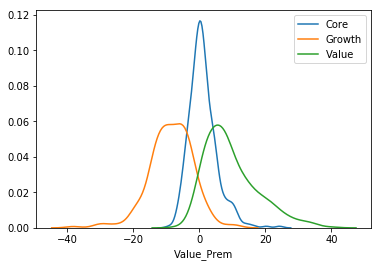

In [12]:
sns.distplot(a.loc[a.Type=='USLargeCore', 'Value_Prem'], hist= False, label= 'Core')
sns.distplot(a.loc[a.Type=='USLargeGrowth', 'Value_Prem'], hist= False, label= 'Growth')
sns.distplot(a.loc[a.Type=='USLargeValue', 'Value_Prem'], hist= False, label= 'Value')
plt.legend()

In [13]:
eVFunds_stats= pd.DataFrame([
                            pd.Series(eVFunds_IR, name= 'IR').astype(float),
                            pd.Series(eVFunds_alpha, name= 'Alpha').astype(float),
                            pd.Series(eVFunds_te, name='TE').astype(float)]).T

c= pd.Series(eVFunds_Type, name='Type')
eVFunds_stats= pd.concat([eVFunds_stats, c], axis=1).dropna(how='any', axis=0)



In [14]:
plt.figure(figsize=(15, 5))
ax=plt.subplot(131)
eVFunds_beta.loc[np.logical_and(eVFunds_beta.BenchmarkCond=='Overall', 
                                [x in ('USLargeCore') for x in eVFunds_beta.Type],
                               ), :].plot.scatter(x= 'RU1000TR', y='Value_Prem', ax= ax, label= 'Core', c='blue')
eVFunds_beta.loc[np.logical_and(eVFunds_beta.BenchmarkCond=='Overall', 
                                [x in ('USLargeValue') for x in eVFunds_beta.Type],
                               ), :].plot.scatter(x= 'RU1000TR', y='Value_Prem', ax= ax, label= 'Value', c='green')
ax= plt.subplot(132)
eVFunds_beta.loc[np.logical_and(eVFunds_beta.BenchmarkCond=='Gain', 
                                [x in ('USLargeCore') for x in eVFunds_beta.Type],
                               ), :].plot.scatter(x= 'RU1000TR', y='Value_Prem', ax= ax, label= 'Core', c='blue')
eVFunds_beta.loc[np.logical_and(eVFunds_beta.BenchmarkCond=='Gain', 
                                [x in ('USLargeValue') for x in eVFunds_beta.Type],
                               ), :].plot.scatter(x= 'RU1000TR', y='Value_Prem', ax= ax, label= 'Value', c='green')
ax= plt.subplot(133)
eVFunds_beta.loc[np.logical_and(eVFunds_beta.BenchmarkCond=='Loss', 
                                [x in ('USLargeCore') for x in eVFunds_beta.Type],
                               ), :].plot.scatter(x= 'RU1000TR', y='Value_Prem', ax= ax, label= 'Core', c='blue')
eVFunds_beta.loc[np.logical_and(eVFunds_beta.BenchmarkCond=='Loss', 
                                [x in ('USLargeValue') for x in eVFunds_beta.Type],
                               ), :].plot.scatter(x= 'RU1000TR', y='Value_Prem', ax= ax, label= 'Value', c='green')

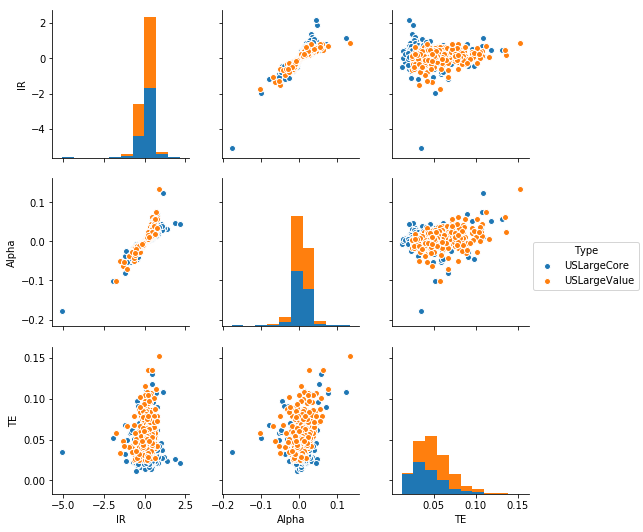

In [15]:
sns.pairplot(eVFunds_stats.loc[[x in ('USLargeCore', 'USLargeValue') for x in eVFunds_stats.Type],], hue='Type')

Three Key Features: Manager Excess Return when BM gains/loses, Full sample beta to VP

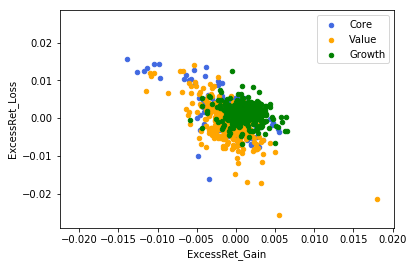

In [16]:
FundRet_Short= FundRet.loc[FundRet.index>= datetime.datetime(2013,7,1), ].dropna(how= 'any', axis=1)
FundRet_Short['RU1000TR']= INDX_Ret.loc[INDX_Ret.index>= datetime.datetime(2013,7,1),'RU1000TR']
FundRet_Short['Value_Prem']= INDX_Ret.loc[INDX_Ret.index>= datetime.datetime(2013,7,1), 'Value_Prem']
FundRet_Short['BM_Gain']= FundRet_Short['RU1000TR']>0

a1= FundRet_Short.loc[FundRet_Short.BM_Gain, ].mean(axis=0)
a1= a1- a1['RU1000TR']
a1.name= 'ExcessRet_Gain'
a1= pd.DataFrame(a1)
a1= pd.concat([a1, c], axis =1).dropna(how='any', axis=0)

a2= FundRet_Short.loc[np.logical_not(FundRet_Short.BM_Gain), ].mean(axis=0)
a2= a2- a2['RU1000TR']
a2.name='ExcessRet_Loss'
a2= pd.DataFrame(a2)

eVExcessRet_Short= pd.concat([a1, a2], axis=1).dropna(how='any', axis=0)
ax= plt.subplot(111)
eVExcessRet_Short.loc[eVExcessRet_Short.Type =='USLargeCore', ].plot(kind= 'scatter', x='ExcessRet_Gain', y= 'ExcessRet_Loss', label= 'Core', c= 'royalblue' , ax= ax)
eVExcessRet_Short.loc[eVExcessRet_Short.Type=='USLargeValue', ].plot(kind='scatter', x='ExcessRet_Gain', y= 'ExcessRet_Loss',  label= 'Value', c= 'orange', ax=ax)
eVExcessRet_Short.loc[eVExcessRet_Short.Type=='USLargeGrowth', ].plot(kind='scatter', x='ExcessRet_Gain', y= 'ExcessRet_Loss',  label= 'Growth', c= 'green', ax=ax)



In [17]:
eVExcessRet_Short.groupby('Type').mean()

ExcessRet_Gain  ExcessRet_Loss
Type                                               
USLargeCore               -0.000593        0.000685
USLargeCore_INDEX         -0.001668        0.001738
USLargeGrowth              0.001132        0.001280
USLargeGrowth_INDEX        0.000961        0.001090
USLargeValue              -0.001128       -0.001275
USLargeValue_INDEX        -0.002081        0.001443

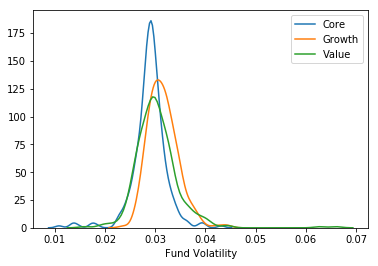

In [18]:
b= FundRet_Short.std(axis=0)
b.name= 'Fund Volatility'
eVFundsVol_Short= pd.concat([b,c], axis=1).dropna(how='any', axis=0)
sns.distplot(eVFundsVol_Short.loc[eVFundsVol_Short.Type=='USLargeCore', 'Fund Volatility'], label= 'Core', hist= False)
sns.distplot(eVFundsVol_Short.loc[eVFundsVol_Short.Type=='USLargeGrowth', 'Fund Volatility'], label= 'Growth', hist= False)
sns.distplot(eVFundsVol_Short.loc[eVFundsVol_Short.Type=='USLargeValue', 'Fund Volatility'], label= 'Value', hist= False)



Classification Problem: 

Features: Volatility, VP_tStats

Label: Core, Growth, Value

Methodology: LDA 

In [19]:
s1= eVFunds_tStats['Value_Prem']
s1.name= 'VP_tStats'
s2= FundRet_Short.std(axis=0)
s2.name= 'volatility'

f_short= {}
for ID in FundRet_Short.columns:
    if ID not in ('RU1000TR', 'Value_Prem', 'BM_Gain'):
        f_short[ID]= EFund(EProdID=ID+"_s", ret= FundRet_Short[ID], benchmark=INDX_EFunds['RU1000TR'])
    
s3= pd.Series({k:v.IR for k ,v in f_short.items()}, name= 'IR_s')

df= pd.concat([s1, s2, s3, c], axis=1).dropna(how='any', axis=0)

MPerf_FR= pickle.load(open('MPerf_FR.p', 'rb'))
MPerf_Stats= pickle.load(open('MPerf_Stats.p', 'rb'))

df_coned= pd.DataFrame( {'Manager_A': {'IR_s': MPerf_Stats.loc['A_RU1k', 'IR'],
                                      'volatility': MPerf_Stats.loc['A_RU1k', 'Volatility'],
                                      'VP_tStats': MPerf_FR['A_RU1k_VP'].tvalues['Value_Prem'],
                                      'Type': 'ConEd_A'},
                        'Manager_B': {'IR_s': MPerf_Stats.loc['B_RU1k', 'IR'],
                                      'volatility': MPerf_Stats.loc['B_RU1k', 'Volatility'],
                                      'VP_tStats': MPerf_FR['B_RU1k_VP'].tvalues['Value_Prem'],
                                     'Type': 'ConEd_B'}}).T
df= pd.concat([df, df_coned], axis=0)
df['IR_s']= df['IR_s'].astype(float)
df['VP_tStats']= df['VP_tStats'].astype(float)
df['volatility']= df['volatility'].astype(float)

df= df.loc[[x in ('USLargeCore', 'USLargeGrowth', 'USLargeValue', 'ConEd_A', 'ConEd_B') for x in df.Type], ]
y= df['Type']
X= df.drop('Type', axis=1)
X= ((X- X.mean())/X.std())
X.clip(lower=-3.5, upper= 3.5, inplace=True)
df= pd.concat([X, y], axis= 1)

np.unique(df.Type)

array(['ConEd_A', 'ConEd_B', 'USLargeCore', 'USLargeGrowth',
       'USLargeValue'], dtype=object)

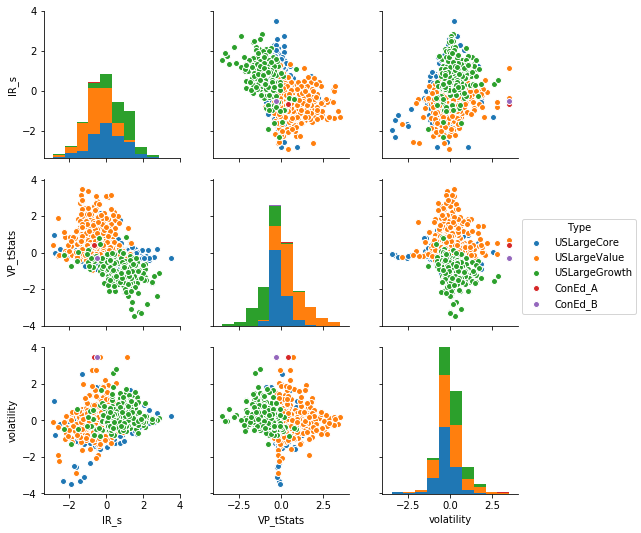

In [20]:
sns.pairplot(data= df, hue= 'Type')

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

df1= df.loc[[x in ('USLargeValue', 'USLargeCore', 'USLargeGrowth') for x in df.Type],]
df2= df.loc[[x in ('ConEd_A', 'ConEd_B') for x in df.Type], ]


lda_clf= LDA().fit(X= df1.drop('Type', axis=1), y= df1['Type'])



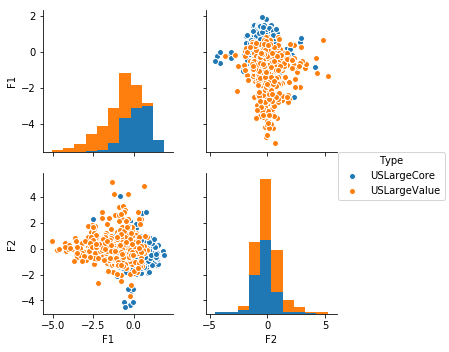

In [22]:
t= pd.DataFrame(lda_clf.transform(df1.drop('Type', axis=1)), columns=['F1', 'F2'], index= df1.index)
df1_new= pd.concat([t, df1.Type], axis=1)
sns.pairplot(data= df1_new.loc[df1_new.Type!= 'USLargeGrowth'], hue= 'Type')

In [23]:
lda_clf.coef_

array([[ 0.18221477, -0.25210304, -0.54126482],
       [ 0.690535  , -2.22028801,  0.25214241],
       [-0.58457491,  1.57826823,  0.33525522]])

In [24]:
lda_clf.explained_variance_ratio_

array([0.94698037, 0.05301963])

In [25]:
lda_clf.predict_proba(X=df2.iloc[:, 0:3].values)

array([[0.054453  , 0.04775327, 0.89779373],
       [0.08670598, 0.291868  , 0.62142603]])

In [26]:
lda_clf.transform(df2.iloc[:, 0:3])

array([[-1.05117068,  5.2841277 ],
       [-0.0770448 ,  5.26183553]])

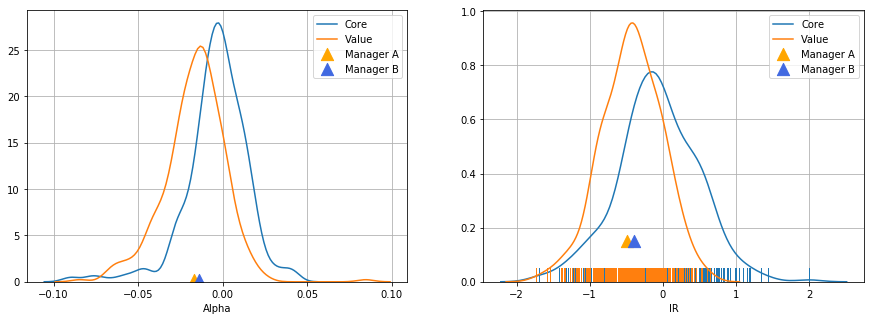

In [27]:
ir= pd.Series({k:v.IR for k,v in f_short.items()}, name= 'IR')
alpha= pd.Series({k:v.alpha for k,v in f_short.items()}, name='Alpha')
te= pd.Series({k:v.te for k,v in f_short.items()}, name='TE')

f_short_stats= pd.concat([ir, te, alpha, c], axis=1).dropna(how='any', axis=0)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(f_short_stats.loc[f_short_stats.Type=='USLargeCore', 'Alpha'], label='Core', hist= False)
sns.distplot(f_short_stats.loc[f_short_stats.Type=='USLargeValue', 'Alpha'], label= 'Value', hist=False)
# sns.distplot(eVFunds_stats.loc[eVFunds_stats.Type=='USLargeGrowth', 'Alpha'],label='Growth', hist= False)
plt.scatter(x= MPerf_Stats.loc['A_RU1k', 'Alpha'], y=0.15, marker= '^', s= 150, c='orange', label= 'Manager A')
plt.scatter(x= MPerf_Stats.loc['B_RU1k', 'Alpha'], y=0.15, marker= '^', s= 150, c= 'royalblue',label= 'Manager B')
plt.legend()
plt.grid()
plt.subplot(1,2,2)
sns.distplot(f_short_stats.loc[f_short_stats.Type=='USLargeCore', 'IR'], label='Core', hist= False, rug=True)
sns.distplot(f_short_stats.loc[f_short_stats.Type=='USLargeValue', 'IR'], label= 'Value', hist=False, rug=True)
# sns.distplot(eVFunds_stats.loc[eVFunds_stats.Type=='USLargeGrowth', 'Alpha'],label='Growth', hist= False)
plt.scatter(x= MPerf_Stats.loc['A_RU1k', 'IR'], y=0.15, marker= '^', s= 150, c='orange', label= 'Manager A')
plt.scatter(x= MPerf_Stats.loc['B_RU1k', 'IR'], y=0.15, marker= '^', s= 150, c= 'royalblue',label= 'Manager B')
plt.legend()
plt.grid()




In [28]:
eVFundsRegs_Short= {}
X= sm.add_constant(FundRet_Short[['RU1000TR', 'Value_Prem']])
for ID in set(FundRet_Short.columns)- set(['RU1000TR', 'BM_Gain', 'Value_Prem']):
    y= FundRet_Short[ID]
    eVFundsRegs_Short[ID]= sm.OLS(endog= y, exog= X).fit()

eVFunds_beta_short= pd.DataFrame({k:v.params for k,v in eVFundsRegs_Short.items()}).T
eVFunds_beta_short= pd.concat([eVFunds_beta_short, pd.Series({k:v.nobs for k,v in eVFundsRegs_Short.items()}, name= 'NObs'),c,], axis=1).dropna(how='any', axis=0)
eVFunds_beta_short.index.name= 'EProdID'

In [29]:
plt.figure(figsize=(8,5))
sns.distplot(eVFunds_beta_short.loc[ eVFunds_beta_short.Type=='USLargeCore', 'Value_Prem'].clip(upper= 1.5), 
             label='eVestment, Core', hist= False, rug=True)
sns.distplot(eVFunds_beta_short.loc[ eVFunds_beta_short.Type=='USLargeValue', 'Value_Prem'].clip(upper= 2.5), 
             label='eVestment, Value', hist= False, rug=True)
# sns.distplot(eVFunds_beta.loc[np.logical_and( eVFunds_beta.Type=='USLargeGrowth', eVFunds_beta.BenchmarkCond=='Overall'), 'Value_Prem'], label='Growth Strategy', hist= False, rug=True)

plt.xlabel('Value Premium Beta')
plt.grid()
plt.scatter(x= MPerf_FR['A_RU1k_VP'].params.Value_Prem, y=0.15, marker= '^', s= 150, c='orange', label= 'Manager A')
plt.scatter(x=MPerf_FR['B_RU1k_VP'].params.Value_Prem, y=0.15, marker= '^', s= 150, c= 'royalblue',label= 'Manager B')
plt.legend()
print(eVFunds_beta_short.loc[ eVFunds_beta_short.Type=='USLargeCore', 'Value_Prem'].count())
print(eVFunds_beta_short.loc[ eVFunds_beta_short.Type=='USLargeValue', 'Value_Prem'].count())

326
360


In [30]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(eVFunds_stats.loc[eVFunds_stats.Type=='USLargeCore', 'Alpha'], label='Core Strategy', hist= False)
sns.distplot(eVFunds_stats.loc[eVFunds_stats.Type=='USLargeValue', 'Alpha'], label= 'Value Strategy', hist=False)
# sns.distplot(eVFunds_stats.loc[eVFunds_stats.Type=='USLargeGrowth', 'Alpha'],label='Growth', hist= False)
plt.legend()
plt.grid()
plt.subplot(1,2,2)
sns.distplot(eVFunds_stats.loc[eVFunds_stats.Type=='USLargeCore', 'IR'], label='Core', hist= False)
sns.distplot(eVFunds_stats.loc[eVFunds_stats.Type=='USLargeValue', 'IR'], label= 'Value', hist=False)
# sns.distplot(eVFunds_stats.loc[eVFunds_stats.Type=='USLargeGrowth', 'Alpha'],label='Growth', hist= False)

plt.legend()
plt.grid()



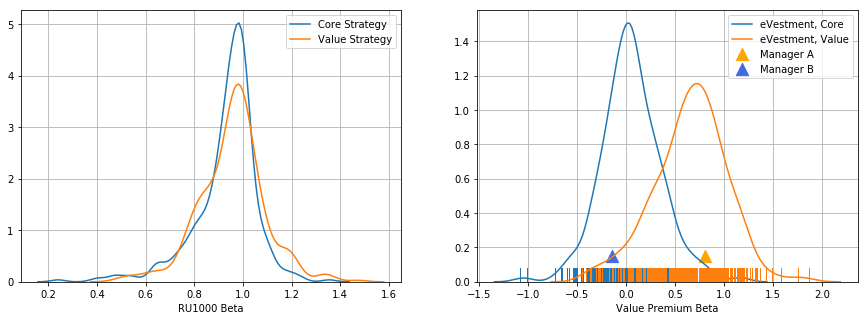

In [31]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(eVFunds_beta.loc[np.logical_and( eVFunds_beta.Type=='USLargeCore', eVFunds_beta.BenchmarkCond=='Overall'), 'RU1000TR'], label='Core Strategy', hist= False)
sns.distplot(eVFunds_beta.loc[np.logical_and( eVFunds_beta.Type=='USLargeValue', eVFunds_beta.BenchmarkCond=='Overall'), 'RU1000TR'], label='Value Strategy', hist= False)
plt.legend()
plt.xlabel('RU1000 Beta')
plt.grid()
plt.subplot(1,2,2)
sns.distplot(eVFunds_beta.loc[np.logical_and( eVFunds_beta.Type=='USLargeCore', eVFunds_beta.BenchmarkCond=='Overall'), 'Value_Prem'], label='eVestment, Core', hist= False, rug=True)
sns.distplot(eVFunds_beta.loc[np.logical_and( eVFunds_beta.Type=='USLargeValue', eVFunds_beta.BenchmarkCond=='Overall'), 'Value_Prem'], label='eVestment, Value', hist= False, rug=True)
# sns.distplot(eVFunds_beta.loc[np.logical_and( eVFunds_beta.Type=='USLargeGrowth', eVFunds_beta.BenchmarkCond=='Overall'), 'Value_Prem'], label='Growth Strategy', hist= False, rug=True)

plt.xlabel('Value Premium Beta')
plt.grid()
plt.scatter(x= MPerf_FR['A_RU1k_VP'].params.Value_Prem, y=0.15, marker= '^', s= 150, c='orange', label= 'Manager A')
plt.scatter(x=MPerf_FR['B_RU1k_VP'].params.Value_Prem, y=0.15, marker= '^', s= 150, c= 'royalblue',label= 'Manager B')
plt.legend()




In [32]:
# sns.distplot(eVFunds_beta.loc[np.logical_and( eVFunds_beta.Type=='USLargeCore', eVFunds_beta.BenchmarkCond=='Overall'), 'Value_Prem'], label='Core Strategy', hist= False)
# sns.distplot(eVFunds_beta.loc[np.logical_and( eVFunds_beta.Type=='USLargeValue', eVFunds_beta.BenchmarkCond=='Overall'), 'Value_Prem'], label='Value Strategy', hist= False)
# plt.legend()
# plt.xlabel('Value Premium Beta')
# plt.grid()

In [33]:
plt.figure(figsize=(15, 5))
fig, ax1= plt.subplots()
ax2= ax1.twinx()
sns.distplot(INDX_Ret.loc[INDX_Ret.index>= datetime.datetime(1987,1,1), 'RU1000TR'],  ax= ax2, label= 'density', color='grey', rug= True, hist= False)
sns.distplot(INDX_Ret.loc[INDX_Ret.index>= datetime.datetime(1987,1,1), 'RU1000TR'],ax= ax1, color='royalblue', label= 'cumulative', hist= False, kde_kws={'cumulative':True})
ax2.set_ylabel('density', color= 'grey')
ax1.set_ylabel('cumulative', color= 'royalblue')
ax1.grid()
ax1.legend().set_visible(False)
ax2.legend().set_visible(False)
ax1.set_yscale('log', basey= 2 )
ax1.set_yticks([0.002, 0.005, 0.02, 0.05, 0.1, 0.2, 0.4,])
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax1.set_ylim([2**-10, 1.1])
ax1.set_xlabel('Monthly Return')


Text(0.5,0,'Monthly Return')

In [34]:
np.percentile(INDX_Ret.loc[INDX_Ret.index>= datetime.datetime(1987,1,1), 'RU1000TR'], q=1)

-0.10454983933004998

In [115]:
# Manager Excess Ret 


FundRet_G= pd.concat([v.validRet for v in eVFunds.values()], axis=1)

Ret_df= FundRet_G.loc[FundRet_G.index>= datetime.datetime(1987,1,1), :]
Ret_df= Ret_df.loc[:, Ret_df.count(axis=0)>=12*20] # exclude managers who have reporting hist less than 100m 
Ret_df= pd.concat([Ret_df, INDX_Ret.loc[INDX_Ret.index>= datetime.datetime(1987,1,1), ['RU1000TR', 'RU1000VTR','RU1000GTR' ,'Value_Prem']]], axis=1)
Ret_df['BM_Cond']= [0 if x>=0 else (1 if x>=-4.24/100 else (2 if x>= -6.86/100 else (3 if x>= -10.45/100 else 4))) for x in Ret_df['RU1000TR']]

ExcessRet_df= Ret_df.sub(Ret_df.loc[:, 'RU1000TR'], axis=0).drop(['RU1000TR', 'Value_Prem', 'BM_Cond'], axis=1)
ExcessRet_value= ExcessRet_df[list(set(ExcessRet_df.columns).intersection(set(InvUniverse['USLargeValue'])))]
ExcessRet_core= ExcessRet_df [list(set(ExcessRet_df.columns).intersection(set(InvUniverse['USLargeCore'])))]
ExcessRet_growth= ExcessRet_df[list(set(ExcessRet_df.columns).intersection(set(InvUniverse['USLargeGrowth'])))]

def percentile_calculator( X, name ):
    # X has index datetime obj, column FundID
    # element monthly (excess) return
    
    # return 25% percentil, median, 75% percentile, mean and positive hit ratio
    
    s=X.mean(axis=0).dropna()
    result= coll.OrderedDict(P25= np.nanpercentile(s, q= 25),
            Median=s.median(),
            P75= np.nanpercentile(s, q=75),
            Mean=s.mean(),
            HitRatio=np.sum([1 if x>0 else 0 for x in s])/s.shape[0])
    return pd.Series(result, name= name)
    
    
excess_core=[]
excess_value= []
excess_growth= []

MgAvgER= []

for level in range(0,5):
    # >= 0 all cases
    # >= 1 loss
    # >=2  worse than -5% loss
    # >=3 worse than -10% loss
    # >=4 worse than -15% loss
    
    obs_threshold= 10 
    if level>= 3:
        obs_threshold=2
    print(level)
    
    l=[]
    t= ExcessRet_core.loc[Ret_df.BM_Cond>= level, ].dropna(how='all', axis=1)
    t= t.loc[:, t.count(axis=0)>=obs_threshold]
    excess_core.append(percentile_calculator(t, 'core_'+str(level)))
    u1= pd.DataFrame(t.mean(axis=0), columns=['MgAvgER'])
    u1['BM_Cond']= level
    u1['Type']= 'Core'
    u1.index.name='EProdID'
    u1.reset_index(inplace= True)
    l.append(u1)
    
    t= ExcessRet_value.loc[Ret_df.BM_Cond>= level, ].dropna(how='all', axis=1)
    t= t.loc[:, t.count(axis=0)>=obs_threshold]
    excess_value.append(percentile_calculator(t, 'value_'+str(level)))
    u1= pd.DataFrame(t.mean(axis=0), columns=['MgAvgER'])
    u1['BM_Cond']= level
    u1['Type']= 'Value'
    u1.index.name='EProdID'
    u1.reset_index(inplace= True)
    l.append(u1)
    
    t= ExcessRet_growth.loc[Ret_df.BM_Cond>= level,].dropna(how='all', axis=1)
    t= t.loc[:, t.count(axis=0)>=obs_threshold]
    excess_growth.append(percentile_calculator(t, 'growth_'+str(level)))
    u1= pd.DataFrame(t.mean(axis=0), columns=['MgAvgER'])
    u1['BM_Cond']= level
    u1['Type']= 'Growth'
    u1.index.name='EProdID'
    u1.reset_index(inplace= True)
    l.append(u1)
    
    MgAvgER.append(pd.concat(l, axis=0))
    
    if level==0:
        
        l= []
        
        t= ExcessRet_core.loc[Ret_df.BM_Cond== 0, ].dropna(how='all', axis=1)
        t= t.loc[:, t.count(axis=0)>=obs_threshold]
        excess_core.append(percentile_calculator(t, 'core_positive'))
        u1= pd.DataFrame(t.mean(axis=0), columns=['MgAvgER'])
        u1['BM_Cond']= -1
        u1['Type']= 'Core'
        u1.index.name='EProdID'
        u1.reset_index(inplace= True)
        l.append(u1)
        
        t= ExcessRet_value.loc[Ret_df.BM_Cond==0, ].dropna(how='all', axis=1)
        t= t.loc[:, t.count(axis=0)>=obs_threshold]
        excess_value.append(percentile_calculator(t, 'value_positive'))
        u1= pd.DataFrame(t.mean(axis=0), columns=['MgAvgER'])
        u1['BM_Cond']= -1
        u1['Type']= 'Value'
        u1.index.name='EProdID'
        u1.reset_index(inplace= True)
        l.append(u1)
        
        
        t= ExcessRet_growth.loc[Ret_df.BM_Cond==0,].dropna(how='all', axis=1)
        t= t.loc[:, t.count(axis=0)>=obs_threshold]
        excess_growth.append(percentile_calculator(t, 'growth_positive'))
        u1= pd.DataFrame(t.mean(axis=0), columns=['MgAvgER'])
        u1['BM_Cond']= -1
        u1['Type']= 'Growth'
        u1.index.name='EProdID'
        u1.reset_index(inplace= True)
        l.append(u1)

        MgAvgER.append(pd.concat(l, axis=0))

0
1
2
3
4


In [116]:
print(ExcessRet_core.shape)
print(ExcessRet_value.shape)

(372, 99)
(372, 110)


In [147]:
plt.figure(figsize= (10,5))
d= pd.concat(MgAvgER, axis=0).reset_index(drop=True)

sns.boxplot(data= d.loc[d.Type!= 'Growth', :], x='BM_Cond', y= 'MgAvgER', hue= 'Type', 
            fliersize=0, width=.6,)
plt.grid()
plt.ylim((-0.04, 0.06))
plt.yticks(np.linspace(-0.03, 0.05, 9))

([<matplotlib.axis.YTick at 0x1c2b8b1780>,
 <a list of 9 Text yticklabel objects>)

In [102]:
pd.concat(excess_core, axis=1).T

Mean       P75  HitRatio    Median       P25
core_0         0.000738  0.001189  0.787879  0.000658  0.000057
core_positive -0.000823  0.000880  0.454545 -0.000142 -0.001893
core_1         0.003736  0.005655  0.787879  0.002238  0.000329
core_2         0.007238  0.012000  0.777778  0.004502  0.000430
core_3         0.009630  0.016044  0.828283  0.006812  0.001448
core_4         0.008655  0.017426  0.666667  0.005892 -0.002035

In [103]:
pd.concat(excess_value, axis=1).T


Mean       P75  HitRatio    Median       P25
value_0         0.000817  0.001207  0.872727  0.000669  0.000293
value_positive -0.001894 -0.000040  0.245455 -0.001434 -0.003500
value_1         0.005995  0.008806  0.936364  0.005148  0.003023
value_2         0.012129  0.016133  0.954545  0.011302  0.005808
value_3         0.010993  0.017654  0.854545  0.009807  0.003489
value_4         0.006162  0.015361  0.590909  0.003442 -0.005809

In [104]:
pd.concat(excess_growth, axis=1).T

Mean       P75  HitRatio    Median       P25
growth_0         0.001070  0.001662  0.882883  0.001012  0.000372
growth_positive  0.001195  0.003153  0.675676  0.001351 -0.000565
growth_1         0.000856  0.002950  0.513514  0.000231 -0.002897
growth_2         0.000229  0.005686  0.405405 -0.001981 -0.007278
growth_3         0.004418  0.011074  0.594595  0.002005 -0.003095
growth_4         0.006961  0.015099  0.684685  0.005626 -0.003408

#### Another way to look at the manager performance in bad times: A the 'good' manager in general are the 'good' manager when mkt lost/crashed? 

Rank Manager by alpha. Check if the manager with high overall alpha have high excess return when market crashed.

In [148]:
## Manager to consider: the col of ExcessRet_core, ExcessRet_value. ie. the manager with long history and consecutive reporting. 

Core_Mg= {}
Value_Mg= {}
Growth_Mg= {}
for ID in ExcessRet_core.columns:
    Core_Mg[ID]= EFund(EProdID=ID, ret= FundRet[ID], benchmark=INDX_EFunds['RU1000TR'])
for ID in ExcessRet_value.columns:
    Value_Mg[ID]= EFund(EProdID=ID, ret= FundRet[ID], benchmark= INDX_EFunds['RU1000TR'])
for ID in ExcessRet_growth.columns:
    Growth_Mg[ID]= EFund(EProdID=ID, ret= FundRet[ID], benchmark= INDX_EFunds['RU1000TR'])
    

a1= pd.Series({k:v.alpha for k,v in Core_Mg.items()}).sort_values()
a1= pd.DataFrame(a1)
a1['rank']= np.floor(np.array(range(0, a1.shape[0]))/a1.shape[0]*4)
Core_Rank= a1['rank']

a1= pd.Series({k:v.alpha for k,v in Value_Mg.items()}).sort_values()
a1= pd.DataFrame(a1)
a1['rank']= np.floor(np.array(range(0, a1.shape[0]))/a1.shape[0]*4)
Value_Rank= a1['rank']

a1= pd.Series({k:v.alpha for k,v in Growth_Mg.items()}).sort_values()
a1= pd.DataFrame(a1)
a1['rank']= np.floor(np.array(range(0, a1.shape[0]))/a1.shape[0]*4)
Growth_Rank= a1['rank']


In [159]:
## Are the manager performance consistent when bm gains or loses

core_er= {}
value_er= {}
growth_er={}

MgAvgER_2=[]

for level in range(0, 5):
    tmp_core= {}
    tmp_value={}
    tmp_growth= {}
    
 
    for q in range(0,4):
        d1= ExcessRet_core.loc[Ret_df.BM_Cond>=level, Core_Rank.index[Core_Rank==q]].mean(axis=0)
        d2= ExcessRet_value.loc[Ret_df.BM_Cond>=level, Value_Rank.index[Value_Rank==q]].mean(axis=0)
        d3= ExcessRet_growth.loc[Ret_df.BM_Cond>= level, Growth_Rank.index[Growth_Rank==q]].mean(axis=0)
        
        tmp_core['q'+str(q)]= d1.median()
        tmp_value['q'+str(q)]=d2.median()
        tmp_growth['q'+str(q)]= d3.median()
        
        d1= pd.DataFrame(d1, columns=['MgAvgER_2'])
        d1['Q']= q
        d1['BM_Cond']= level
        d1.index.name= 'EProdID'
        d1['Type']= 'Core'
        d1.reset_index(inplace=True)
        
        d2= pd.DataFrame(d2, columns=['MgAvgER_2'])
        d2['Q']= q
        d2['BM_Cond']= level
        d2.index.name= 'EProdID'
        d2['Type']= 'Value'
        d2.reset_index(inplace=True)
        
        d3= pd.DataFrame(d3, columns=['MgAvgER_2'])
        d3['Q']= q
        d3['BM_Cond']= level
        d3['Type']= 'Growth'
        d3.index.name= 'EProdID'
        d3.reset_index(inplace=True)
        
        MgAvgER_2.append(d1)
        MgAvgER_2.append(d2)
        MgAvgER_2.append(d3)
        
        
    core_er['core_'+str(level)]= tmp_core
    value_er['value_'+str(level)]= tmp_value
    growth_er['growth_'+str(level)]= tmp_growth
    
    
    if level==0:
        tmp_core= {}
        tmp_value={}
        tmp_growth={}
 
        for q in range(0,4):
        
            d1= ExcessRet_core.loc[Ret_df.BM_Cond==level, Core_Rank.index[Core_Rank==q]].mean(axis=0)
            d2= ExcessRet_value.loc[Ret_df.BM_Cond==level, Value_Rank.index[Value_Rank==q]].mean(axis=0)
            d3= ExcessRet_growth.loc[Ret_df.BM_Cond== level, Growth_Rank.index[Growth_Rank==q]].mean(axis=0)
            tmp_core['q'+str(q)]= d1.median()
            tmp_value['q'+str(q)]=d2.median()
            tmp_growth['q'+str(q)]=d3.median()
            
            d1= pd.DataFrame(d1, columns=['MgAvgER_2'])
            d1['Q']= q
            d1['BM_Cond']= -1
            d1['Type']='Core'
            d1.index.name= 'EProdID'
            d1.reset_index(inplace=True)
            
            d2= pd.DataFrame(d2, columns=['MgAvgER_2'])
            d2['Q']= q
            d2['BM_Cond']= -1
            d2['Type']= 'Value'
            d2.index.name= 'EProdID'
            d2.reset_index(inplace=True)
            
            d3= pd.DataFrame(d3, columns=['MgAvgER_2'])
            d3['Q']= q
            d3['BM_Cond']= -1
            d3['Type']='Growth'
            d3.index.name= 'EProdID'
            d3.reset_index(inplace=True)
            
            MgAvgER_2.append(d1)
            MgAvgER_2.append(d2)
            MgAvgER_2.append(d3)
            
        
        core_er['core_positive']= tmp_core
        value_er['value_positive']= tmp_value
        growth_er['growth_positive']= tmp_growth
        
    

In [160]:
pd.DataFrame(core_er).T


q0        q1        q2        q3
core_0        -0.000241  0.000435  0.000841  0.002133
core_1         0.001473  0.001356  0.001308  0.005169
core_2         0.004175  0.002875  0.002862  0.010129
core_3         0.005654  0.005819  0.006405  0.012435
core_4         0.004492  0.005892  0.002592  0.010192
core_positive -0.001593 -0.000276  0.000575  0.000811

In [161]:
pd.DataFrame(value_er).T

q0        q1        q2        q3
value_0         0.000009  0.000472  0.000980  0.001797
value_1         0.004437  0.004469  0.006089  0.005844
value_2         0.009279  0.011318  0.011709  0.011919
value_3         0.006740  0.009689  0.012786  0.009625
value_4         0.003042  0.009063  0.006571 -0.001208
value_positive -0.002217 -0.001382 -0.001752 -0.000249

In [162]:
pd.DataFrame(growth_er).T

q0        q1        q2        q3
growth_0         0.000063  0.000780  0.001302  0.002213
growth_1        -0.000973 -0.000834  0.001461  0.001390
growth_2        -0.002461 -0.002607 -0.001707  0.000941
growth_3         0.001996  0.002283  0.001418  0.002872
growth_4         0.005192  0.003036  0.005842  0.005992
growth_positive  0.000156  0.001715  0.001604  0.002040

Text(0.5,1,'Q4')

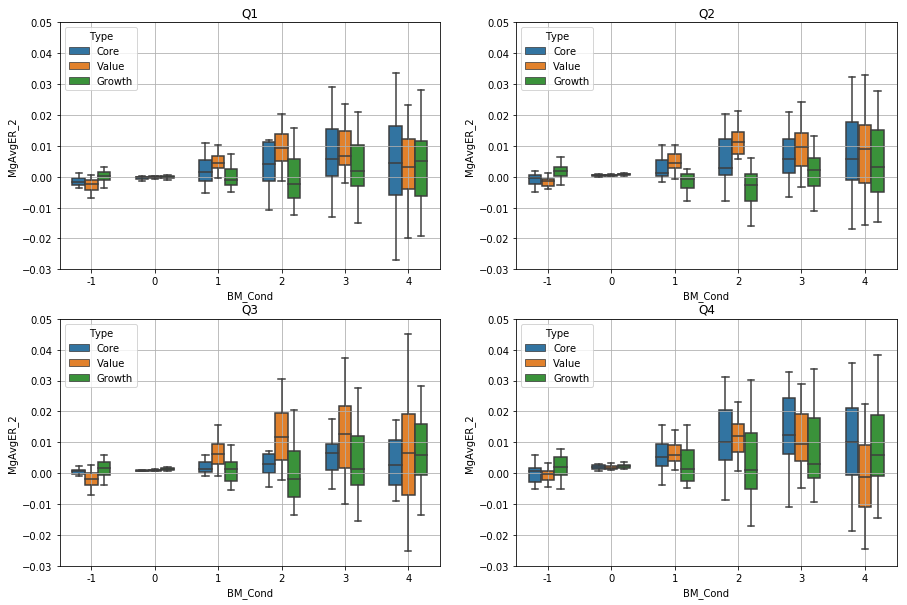

In [192]:
plt.figure(figsize= (15,10))
d= pd.concat(MgAvgER_2, axis=0).reset_index(drop=True)
ax1= plt.subplot(221)
sns.boxplot(data= d.loc[d.Q==0, :], x='BM_Cond', y= 'MgAvgER_2', hue= 'Type', 
            fliersize=0, width=.6, whis= 1)
ax1.set_ylim((-0.03, 0.05))
ax1.set_yticks(np.linspace(-0.03, 0.05, 9))
ax1.grid()
ax1.set_title('Q1')
ax2=plt.subplot(222)
sns.boxplot(data= d.loc[d.Q==1, :], x='BM_Cond', y= 'MgAvgER_2', hue= 'Type', 
            fliersize=0, width=.6, whis= 1)
ax2.grid()
ax2.set_ylim((-0.03, 0.05))
ax2.set_yticks(np.linspace(-0.03, 0.05, 9))
ax2.set_title('Q2')
ax3=plt.subplot(223)
sns.boxplot(data= d.loc[d.Q==2, :], x='BM_Cond', y= 'MgAvgER_2', hue= 'Type', 
            fliersize=0, width=.6, whis= 1)
ax3.set_ylim((-0.03, 0.05))
ax3.set_yticks(np.linspace(-0.03, 0.05, 9))
ax3.grid()
ax3.set_title('Q3')
ax4= plt.subplot(224)
sns.boxplot(data= d.loc[d.Q==3, :], x='BM_Cond', y= 'MgAvgER_2', hue= 'Type', 
            fliersize=0, width=.6, whis= 1)
ax4.set_ylim((-0.03, 0.05))
ax4.set_yticks(np.linspace(-0.03, 0.05, 9))
ax4.grid()
ax4.set_title('Q4')


In [166]:
d.dtypes

EProdID       object
MgAvgER_2    float64
Q              int64
BM_Cond        int64
Type          object
dtype: object

### Who is Manager A and B? 

In [62]:
MPerf_Ret= pickle.load(open('MPerf_Ret.p', 'rb'))
corr_df= {}
for ID in FundRet.columns:
    fd= FundRet[ID].dropna()
    if fd.shape[0]< 45:
        continue
    a1= pd.concat([MPerf_Ret['Return_A'], fd],axis=1).corr().iloc[0,1]
    a2= pd.concat([MPerf_Ret['Return_B'], fd], axis=1).corr().iloc[0,1]
    corr_df[ID]= {'A': a1, 'B':a2}
    
corr_df= pd.DataFrame(corr_df).T

In [65]:
corr_df.sort_values('B', ascending=False)

# A, 819580, 0.998169
# B, 604716, 0.999690

A         B
604716   0.870228  0.999690
838053   0.917295  0.947111
666065   0.942983  0.946437
622790   0.912514  0.946409
775508   0.916480  0.946008
0        0.930631  0.943464
698394   0.905790  0.943397
668520   0.911838  0.943110
2369     0.930171  0.943102
616019   0.822423  0.943010
602424   0.905671  0.942731
846      0.927828  0.942721
786978   0.941719  0.942440
847      0.927482  0.942369
602551   0.899276  0.942235
799564   0.896676  0.941822
9        0.933150  0.941301
25       0.933150  0.941301
954745   0.892642  0.940854
608680   0.919048  0.940471
1149178  0.943688  0.940359
2069     0.938575  0.940255
1412     0.929071  0.939165
1096719  0.897361  0.939150
24       0.920958  0.938610
606271   0.897388  0.938598
678455   0.906149  0.938568
1543507  0.940209  0.937924
684348   0.924312  0.937830
1107857  0.957028  0.937722
...           ...       ...
982527   0.644742  0.736126
612295   0.653334  0.734297
805435   0.860387  0.734266
686295   0.719198  0.733786
656510   0.780881  0.727981
1566282  0.641721  0.726917
1248657  0.873696  0.720679
651110   0.614468  0.719671
990352   0.854048  0.716977
989401   0.853718  0.715774
602422   0.608391  0.713699
602801   0.732973  0.711788
1488973  0.654831  0.707009
618354   0.857313  0.698584
622806   0.810280  0.694836
644872   0.528786  0.682850
683005   0.759684  0.680383
621033   0.515912  0.672633
668621   0.489813  0.670915
617288   0.530433  0.656331
657641   0.509051  0.655492
600483   0.547125  0.654745
656516   0.699993  0.637223
615072   0.519242  0.613647
602198   0.744400  0.568916
1110345  0.429617  0.548255
790307   0.374148  0.540770
682896   0.583795  0.516530
614278        NaN       NaN
694626        NaN       NaN

[1082 rows x 2 columns]

In [64]:
FundAttr[['819580', '604716']]

819580  \
Asset Class                                                      Equity   
Default Reporting Method                                  Gross of Fees   
Default Vehicle Type                        Separate/Segregated Account   
Firm Name                      Barrow, Hanley, Mewhinney & Strauss, LLC   
Geographic Region                                         United States   
Portfolio Management Strategy                                    Active   
Preferred Benchmark                                  Russell 1000 Value   
Primary Investment Approach                                 Fundamental   
Primary Universe                    eVestment US Large Cap Value Equity   
Product Added Date                                  2012-05-24 00:00:00   
Product Market Focus                                      Institutional   
Product Name                              Dividend Focused Value Equity   
Product/Fund Inception Date                         2000-04-01 00:00:00   
RM                                                                Gross   
Sub-Strategy                                                      Value   
VT                                                                   SA   

                                                             604716  
Asset Class                                                  Equity  
Default Reporting Method                              Gross of Fees  
Default Vehicle Type                    Separate/Segregated Account  
Firm Name                      Hardman Johnston Global Advisors LLC  
Geographic Region                                     United States  
Portfolio Management Strategy                                Active  
Preferred Benchmark                             Russell 1000 Growth  
Primary Investment Approach                             Fundamental  
Primary Universe               eVestment US Large Cap Growth Equity  
Product Added Date                              2009-04-23 00:00:00  
Product Market Focus                                  Institutional  
Product Name                                          Growth Equity  
Product/Fund Inception Date                     1990-12-31 00:00:00  
RM                                                            Gross  
Sub-Strategy                                                 Growth  
VT                                                               SA

In [102]:
FundRet[['819580', '604716']].dropna(how='any', axis=0)

819580  604716
2000-04-30  0.0627 -0.0107
2000-05-31  0.0448  0.0482
2000-06-30  0.0045 -0.0204
2000-07-31  0.0055 -0.0434
2000-08-31  0.0489  0.0512
2000-09-30  0.0359  0.0238
2000-10-31  0.0432  0.0535
2000-11-30  0.0002  0.0434
2000-12-31  0.0651  0.0784
2001-01-31  0.0069 -0.0419
2001-02-28 -0.0004  0.0087
2001-03-31 -0.0213 -0.0299
2001-04-30  0.0557  0.0208
2001-05-31  0.0220  0.0439
2001-06-30 -0.0415 -0.0077
2001-07-31  0.0203  0.0251
2001-08-31 -0.0150  0.0169
2001-09-30 -0.0467 -0.0521
2001-10-31 -0.0043 -0.0072
2001-11-30  0.0391  0.0631
2001-12-31  0.0343  0.0427
2002-01-31 -0.0012 -0.0059
2002-02-28  0.0125  0.0232
2002-03-31  0.0376  0.0188
2002-04-30 -0.0285 -0.0393
2002-05-31  0.0070  0.0133
2002-06-30 -0.0395 -0.0473
2002-07-31 -0.0961 -0.0372
2002-08-31  0.0297  0.0158
2002-09-30 -0.1076 -0.0767
...            ...     ...
2015-07-31  0.0169  0.0289
2015-08-31 -0.0520 -0.0663
2015-09-30 -0.0335 -0.0096
2015-10-31  0.0681  0.0975
2015-11-30  0.0105  0.0107
2015-12-31 -0.0199 -0.0186
2016-01-31 -0.0441 -0.0511
2016-02-29 -0.0018  0.0157
2016-03-31  0.0610  0.0581
2016-04-30  0.0228 -0.0033
2016-05-31  0.0051  0.0046
2016-06-30  0.0078  0.0142
2016-07-31  0.0318  0.0287
2016-08-31  0.0083  0.0154
2016-09-30 -0.0142  0.0017
2016-10-31 -0.0092 -0.0383
2016-11-30  0.0616  0.0242
2016-12-31  0.0217  0.0128
2017-01-31  0.0065  0.0203
2017-02-28  0.0438  0.0350
2017-03-31 -0.0066 -0.0047
2017-04-30  0.0008  0.0010
2017-05-31  0.0072  0.0179
2017-06-30  0.0219  0.0039
2017-07-31 -0.0011  0.0104
2017-08-31 -0.0044  0.0037
2017-09-30  0.0355  0.0081
2017-10-31  0.0082 -0.0007
2017-11-30  0.0280  0.0194
2017-12-31  0.0200  0.0127

[213 rows x 2 columns]

In [40]:
ax= plt.figure(figsize= (10,5))
d= eVFunds_beta.loc[[x in ('USLargeCore', 'USLargeValue') for x in eVFunds_beta.Type], ]
sns.boxplot(x='Type', y='RU1000TR', hue='BenchmarkCond', width=0.4,
            data= d, fliersize=0)
plt.grid()
plt.ylim((0.4, 1.8))
plt.xlabel('')
plt.ylabel('RU1000 Beta')

Text(0,0.5,'RU1000 Beta')

In [41]:
ax= plt.figure(figsize= (10,5))
d= eVFunds_beta.loc[[x in ('USLargeCore', 'USLargeValue') for x in eVFunds_beta.Type], ]
sns.boxplot(x='Type', y='Value_Prem', hue='BenchmarkCond', width=0.3,
            data= d, fliersize=0)
plt.grid()
plt.ylim((-1.2, 2))
plt.xlabel('')
plt.ylabel('Value Premium Beta')

Text(0,0.5,'Value Premium Beta')

In [108]:
eVFunds_beta

BenchmarkCond  EProdID   NObs  RU1000TR                 Type  Value_Prem  \
0          Overall        0  396.0  0.993924  USLargeGrowth_INDEX    0.036309   
1          Overall        1  396.0  1.002905  USLargeGrowth_INDEX   -0.913474   
2          Overall       10  396.0  1.008979  USLargeGrowth_INDEX   -0.930981   
3          Overall  1002943   87.0  0.785429          USLargeCore   -0.011472   
4          Overall  1003632   44.0  1.019713          USLargeCore   -0.179521   
5          Overall  1008488   52.0  1.056980          USLargeCore    0.418247   
6          Overall  1079446   48.0  0.941811         USLargeValue    0.576368   
7          Overall  1079917  157.0  0.996824         USLargeValue    1.031453   
8          Overall  1088765  168.0  0.959451         USLargeValue    0.399513   
9          Overall  1090390   42.0  1.031036         USLargeValue    0.933600   
10         Overall  1092787   57.0  0.834510          USLargeCore    0.521909   
11         Overall  1093129  190.0  1.154030         USLargeValue    0.556141   
12         Overall  1096719   76.0  0.476502          USLargeCore    0.061772   
13         Overall  1097476  114.0  1.103999          USLargeCore   -0.111408   
14         Overall  1097598  333.0  0.972530          USLargeCore    0.690032   
15         Overall  1097672  240.0  1.065301        USLargeGrowth   -0.792063   
16         Overall  1099803   90.0  1.182613         USLargeValue    0.545258   
17         Overall       11  396.0  1.000000   USLargeValue_INDEX    0.999984   
18         Overall  1100661   58.0  0.647787          USLargeCore    0.283491   
19         Overall  1100705  168.0  0.992858         USLargeValue   -0.078611   
20         Overall  1107829  261.0  0.967563         USLargeValue    0.668736   
21         Overall  1107830  225.0  0.954768         USLargeValue    0.451289   
22         Overall  1107857  261.0  0.937752          USLargeCore    0.372922   
23         Overall  1110154  132.0  1.009186         USLargeValue    0.260816   
24         Overall  1110345   81.0  0.414262          USLargeCore    0.263365   
25         Overall  1113562  240.0  1.021655        USLargeGrowth   -0.603234   
26         Overall  1115593   70.0  1.027918         USLargeValue    1.429614   
27         Overall  1118371   66.0  1.142599         USLargeValue    1.326593   
28         Overall  1120423   76.0  1.005409         USLargeValue    0.272282   
29         Overall  1120427   64.0  0.959017         USLargeValue    0.379062   
...            ...      ...    ...       ...                  ...         ...   
3093          Loss   963947   86.0  0.972746        USLargeGrowth   -1.332850   
3094          Loss   972526   31.0  1.209448         USLargeValue   -0.034478   
3095          Loss   973244   86.0  0.860187        USLargeGrowth    0.526061   
3096          Loss   975787   24.0  0.882281         USLargeValue    0.553773   
3097          Loss   976545  136.0  1.035512        USLargeGrowth   -0.255779   
3098          Loss   978522   27.0  1.129424          USLargeCore   -0.723168   
3099          Loss   978584   39.0  1.009418         USLargeValue   -0.289247   
3100          Loss   982013   83.0  0.805934          USLargeCore    0.218550   
3101          Loss   982462   31.0  1.019697          USLargeCore   -0.288487   
3102          Loss   982527   54.0  1.198126        USLargeGrowth   -1.936328   
3103          Loss   983480   45.0  1.294346         USLargeValue    0.226943   
3104          Loss   983523   16.0  1.266382          USLargeCore   -0.042346   
3105          Loss   984851   16.0  0.939274         USLargeValue    0.005358   
3106          Loss   984852   15.0  1.032920         USLargeValue   -0.306925   
3107          Loss   985294   14.0  1.174649          USLargeCore    0.604757   
3108          Loss   985361  136.0  1.002161          USLargeCore    0.002443   
3109          Loss   985920   15.0  1.242441         USLargeValue    1.076527   
3110          Loss   986448   48.0  

In [42]:
eVFunds_beta.loc[[x in ('USLargeValue', 'USLargeCore') for x in eVFunds_beta.Type],].groupby( ['Type', 'BenchmarkCond']).median()

NObs  RU1000TR  Value_Prem     const
Type         BenchmarkCond                                       
USLargeCore  Gain           122.0  0.950322    0.038643  0.001079
             Loss            57.0  0.947332    0.063638  0.000453
             Overall        177.5  0.957616    0.038590  0.000925
USLargeValue Gain           125.0  0.965685    0.668553  0.000772
             Loss            59.0  0.954157    0.728015  0.000838
             Overall        183.0  0.965064    0.677834  0.000937

In [43]:
eVFunds_stats.groupby('Type').median()

IR     Alpha        TE
Type                                             
USLargeCore          0.188505  0.006287  0.038556
USLargeCore_INDEX   -0.026324 -0.001184  0.034432
USLargeGrowth        0.165517  0.010340  0.057756
USLargeGrowth_INDEX -0.035837 -0.001645  0.045900
USLargeValue         0.125317  0.006432  0.052242
USLargeValue_INDEX  -0.056857 -0.001910  0.046313

#### Event Analysis

How the group of Value and Core Managers performs when market crashes? 

The performance: absolute, and relative to RU1000

In [44]:
Downturns= pickle.load(open('Downturns.p', 'rb'))

Downturns


{0: {'End': datetime.datetime(1987, 12, 1, 0, 0),
  'Event': '1987 Black Monday',
  'Start': datetime.datetime(1987, 9, 1, 0, 0)},
 1: {'End': datetime.datetime(1990, 11, 1, 0, 0),
  'Event': '1990 MidEast Oil Crisis',
  'Start': datetime.datetime(1990, 5, 1, 0, 0)},
 2: {'End': datetime.datetime(2003, 5, 1, 0, 0),
  'Event': '2000s Market Downturns',
  'Start': datetime.datetime(2000, 2, 1, 0, 0)},
 3: {'End': datetime.datetime(2009, 4, 1, 0, 0),
  'Event': '2008 Financial Crisis',
  'Start': datetime.datetime(2007, 10, 1, 0, 0)},
 4: {'End': datetime.datetime(2016, 3, 1, 0, 0),
  'Event': '2015 China Selloff',
  'Start': datetime.datetime(2015, 7, 1, 0, 0)}}

In [45]:
DownturnEFunds= {}
for k, v in Downturns.items():
    start= v['Start']
    end= v['End']
    event= v['Event']
    
    Rets= FundRet.loc[np.logical_and(FundRet.index>= start, FundRet.index<= end),:].dropna(how= 'any', axis=1)
    evFunds= {}
    for ID in Rets.columns:
        evFunds[ID]= EFund(EProdID= ID, ret= Rets[ID], benchmark=INDX_EFunds['RU1000TR'])
    evFunds['RU1000V']= EFund(EProdID='RU1000V', 
                              ret= INDX_Ret.loc[ np.logical_and(INDX_Ret.index>= start, INDX_Ret.index<= end), 'RU1000VTR'].dropna(), 
                              benchmark=INDX_EFunds['RU1000TR'])
    
    DownturnEFunds[k]= evFunds
    

In [46]:

df_list= []
c= pd.Series(eVFunds_Type, name= 'Type')
c= pd.concat([c, pd.Series({'RU1000V': 'RU1000V'})], axis=0)
c.name= 'Type'


for k, v in DownturnEFunds.items():
    s1= pd.Series({s:u.validAnnualRet for s, u in v.items()}, name= 'Annual Return')
    s2= pd.Series({s:u.volatility for s, u in v.items()}, name= 'volatility')
    s3= pd.Series({s:u.MaxDD[1] for s, u in v.items()}, name= 'Max DD')
    s4= pd.Series({s:u.bmAnnualRet for s,u in v.items()}, name= 'Benchmark Annual Return')
    s5= pd.Series({s:u.bmVolatility for s,u in v.items()}, name= 'Benchmark Volatility')
    s6= pd.Series({s:u.RMaxDD[1] for s, u in v.items()}, name= 'Relative Max DD')
    s7= pd.Series({s:u.alpha for s, u in v.items()}, name= 'Alpha')
    s8= pd.Series({s:u.te for s,u in v.items()}, name= 'Tracking Error')
    s9= pd.Series({s:u.IR for s,u in v.items()}, name='IR')
    
    df= pd.concat([s1, s2, s3, s4, s5, s6,s7, s8,s9, c], axis=1).dropna(how='any', axis=0)
    df['Event']= k
    df_list.append(df)

eVFunds_EventPerf= pd.concat(df_list, axis=0)

In [47]:
pd.DataFrame(Downturns).T

End                    Event                Start
0  1987-12-01 00:00:00        1987 Black Monday  1987-09-01 00:00:00
1  1990-11-01 00:00:00  1990 MidEast Oil Crisis  1990-05-01 00:00:00
2  2003-05-01 00:00:00   2000s Market Downturns  2000-02-01 00:00:00
3  2009-04-01 00:00:00    2008 Financial Crisis  2007-10-01 00:00:00
4  2016-03-01 00:00:00       2015 China Selloff  2015-07-01 00:00:00

In [48]:
eVFunds_EventPerf.loc[[x in ('USLargeValue', 
                             'USLargeCore',
                            'RU1000V') for x in eVFunds_EventPerf.Type], ].groupby(['Event', 'Type']).median().T

Event                           0                                  1  \
Type                      RU1000V USLargeCore USLargeValue   RU1000V   
Annual Return           -0.715626   -0.712129    -0.736011 -0.193410   
volatility               0.328281    0.340928     0.314679  0.196748   
Max DD                  -0.256173   -0.254734    -0.262361 -0.170725   
Benchmark Annual Return -0.750458   -0.750458    -0.750458 -0.145588   
Benchmark Volatility     0.347980    0.347980     0.347980  0.214337   
Relative Max DD          0.000000    0.000000    -0.003993 -0.018893   
Alpha                    0.034832    0.038329     0.014447 -0.047823   
Tracking Error           0.020052    0.048506     0.053412  0.029408   
IR                       1.737083    0.681497     0.283305 -1.626205   

Event                                                    2              \
Type                    USLargeCore USLargeValue   RU1000V USLargeCore   
Annual Return             -0.127464    -0.193767 -0.027538   -0.057262   
volatility                 0.212557     0.193080  0.173008    0.180263   
Max DD                    -0.148998    -0.170542 -0.276837   -0.357371   
Benchmark Annual Return   -0.145588    -0.145588 -0.107180   -0.107180   
Benchmark Volatility       0.214337     0.214337  0.188642    0.188642   
Relative Max DD           -0.009044    -0.028299 -0.069426   -0.059386   
Alpha                      0.018123    -0.048180  0.079642    0.049918   
Tracking Error             0.040612     0.050949  0.102159    0.066584   
IR                         0.858844    -1.181384  0.779591    0.688218   

Event                                        3                           \
Type                    USLargeValue   RU1000V USLargeCore USLargeValue   
Annual Return               0.016895 -0.374113   -0.303063    -0.325179   
volatility                  0.174444  0.227485    0.214398     0.219943   
Max DD                     -0.260408 -0.543895   -0.470914    -0.493750   
Benchmark Annual Return    -0.107180 -0.336259   -0.336259    -0.336259   
Benchmark Volatility        0.188642  0.221472    0.221472     0.221472   
Relative Max DD            -0.067712 -0.078848   -0.033546    -0.056408   
Alpha                       0.124075 -0.037854    0.033196     0.011079   
Tracking Error              0.116180  0.050816    0.049632     0.060653   
IR                          1.072836 -0.744937    0.660498     0.194106   

Event                           4                           
Type                      RU1000V USLargeCore USLargeValue  
Annual Return           -0.121250   -0.098235    -0.126916  
volatility               0.146547    0.153202     0.150525  
Max DD                  -0.087949   -0.089980    -0.098357  
Benchmark Annual Return -0.090802   -0.090802    -0.090802  
Benchmark Volatility     0.155602    0.155602     0.155602  
Relative Max DD         -0.010929   -0.019873    -0.030177  
Alpha                   -0.030449   -0.007434    -0.036114  
Tracking Error           0.018933    0.028802     0.036134  
IR                      -1.608200   -0.249187    -1.065778

In [49]:
u= eVFunds['0']

u.RMaxDD


[Timestamp('2014-02-28 00:00:00'), -0.07022948715681539]

In [50]:
eVFunds_Type

{'647402': 'USLargeCore',
 '601179': 'USLargeGrowth',
 '777926': 'USLargeCore',
 '617307': 'USLargeValue',
 '669919': 'USLargeValue',
 '675052': 'USLargeGrowth',
 '807283': 'USLargeValue',
 '607957': 'USLargeCore',
 '684602': 'USLargeGrowth',
 '600928': 'USLargeCore',
 '790215': 'USLargeValue',
 '1257355': 'USLargeGrowth',
 '600457': 'USLargeValue',
 '602501': 'USLargeCore',
 '1475108': 'USLargeCore',
 '674903': 'USLargeCore',
 '613842': 'USLargeCore',
 '601822': 'USLargeCore',
 '666610': 'USLargeCore',
 '608680': 'USLargeCore',
 '601215': 'USLargeValue',
 '651133': 'USLargeValue',
 '1228842': 'USLargeCore',
 '618865': 'USLargeValue',
 '610150': 'USLargeValue',
 '654318': 'USLargeValue',
 '1354814': 'USLargeValue',
 '620731': 'USLargeValue',
 '844601': 'USLargeCore',
 '609625': 'USLargeCore',
 '786899': 'USLargeGrowth',
 '606977': 'USLargeCore',
 '791999': 'USLargeValue',
 '602363': 'USLargeCore',
 '666867': 'USLargeGrowth',
 '1': 'USLargeGrowth_INDEX',
 '603473': 'USLargeCore',
 '6004